In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import date
%matplotlib inline

In [2]:
df_cases = pd.read_csv('../../data/external/pandemic/owid-covid-data_US.csv', parse_dates=['date'])
df_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180516,ZWE,Africa,Zimbabwe,2022-04-16,247237.0,0.0,44.571,5462.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180517,ZWE,Africa,Zimbabwe,2022-04-17,247278.0,41.0,45.714,5463.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180518,ZWE,Africa,Zimbabwe,2022-04-18,247297.0,19.0,41.000,5464.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180519,ZWE,Africa,Zimbabwe,2022-04-19,247297.0,0.0,29.000,5464.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
df_cases_global = df_cases.copy()
df_cases_global = df_cases_global.groupby(by='date').agg(
    new_cases=pd.NamedAgg(column='new_cases', aggfunc='sum'),
    new_cases_smoothed=pd.NamedAgg(column='new_cases_smoothed', aggfunc='sum'),
)
df_cases_global.reset_index(inplace=True)
df_cases_global.tail()

,date,new_cases,new_cases_smoothed
836,2022-04-16,2451778.0,3730099.139
837,2022-04-17,1866485.0,3640452.141
838,2022-04-18,1952774.0,3309558.715
839,2022-04-19,4406042.0,3248654.571
840,2022-04-20,4350380.0,3187346.142


In [4]:
df_cases_global = df_cases_global[df_cases_global['date'].dt.date >= date.fromisoformat('2020-01-02')]
df_cases_global = df_cases_global[df_cases_global['date'].dt.date <= date.fromisoformat('2022-02-03')]
df_cases_global.tail()

,date,new_cases,new_cases_smoothed
760,2022-01-30,10119969.0,1.450135e+07
761,2022-01-31,11583997.0,1.393664e+07
762,2022-02-01,13994504.0,1.375212e+07
763,2022-02-02,14105205.0,1.346312e+07
764,2022-02-03,13934669.0,1.309224e+07


In [5]:
df_cases_global.to_csv('../../data/processed/global_case_numbers.csv', index=False)

In [6]:
df_cases_USA = df_cases.query('iso_code == "USA"')
df_cases_USA = df_cases_USA[['date', 'new_cases', 'new_cases_smoothed']]
df_cases_USA = df_cases_USA[df_cases_USA['date'].dt.date <= date.fromisoformat('2022-02-03')]
df_cases_USA.tail()

,date,new_cases,new_cases_smoothed
170806,2022-01-30,197945.0,505146.857
170807,2022-01-31,542235.0,450895.571
170808,2022-02-01,325402.0,426931.571
170809,2022-02-02,329513.0,384860.000
170810,2022-02-03,274798.0,351792.143


In [7]:
df_trends = pd.read_csv('../../data/processed/gt.csv', parse_dates=['date'])

In [8]:
tags = [
    "/m/01cpyy", # Coronavirus (Virus)
    "/m/01b_06", # Symptom (Topic)
    "/m/07kfjfg", # Airborne transmission (Disease)
    
    "/m/0dsdr32", # Travel warning (Topic)
    "/m/05zdp", # Public transport (Transit service type)
    "/m/012sj0", # Hygiene (Topic)

    "/m/07__7", # Vaccine (Topic)
    "/m/0dxh1", # Emergency medical services (Medical specialty)
    "/m/0119h9rd", # Rapid diagnostic test (Topic)
]
labels = [
    "Coronavirus",
    "Symptom",
    "Airborne transmission",
    
    "Travel warning",
    "Public transport",
    "Hygiene",
    
    "Vaccine",
    "Emergency medical services",
    "Rapid diagnostic test"
]

In [9]:
waves = [
    ("2020-04-07", "2020-04-17", "First wave", "tab:blue"),
    ("2020-07-14", "2020-07-22", "Second wave", "yellow"),
    ("2020-11-20", "2021-01-08", "Third wave", "tab:orange"),
    ("2021-09-01", "2021-09-07", "Fourth wave", "tab:pink"),
    ("2022-01-15", "2022-02-03", "Fifth wave", "tab:purple"),
]

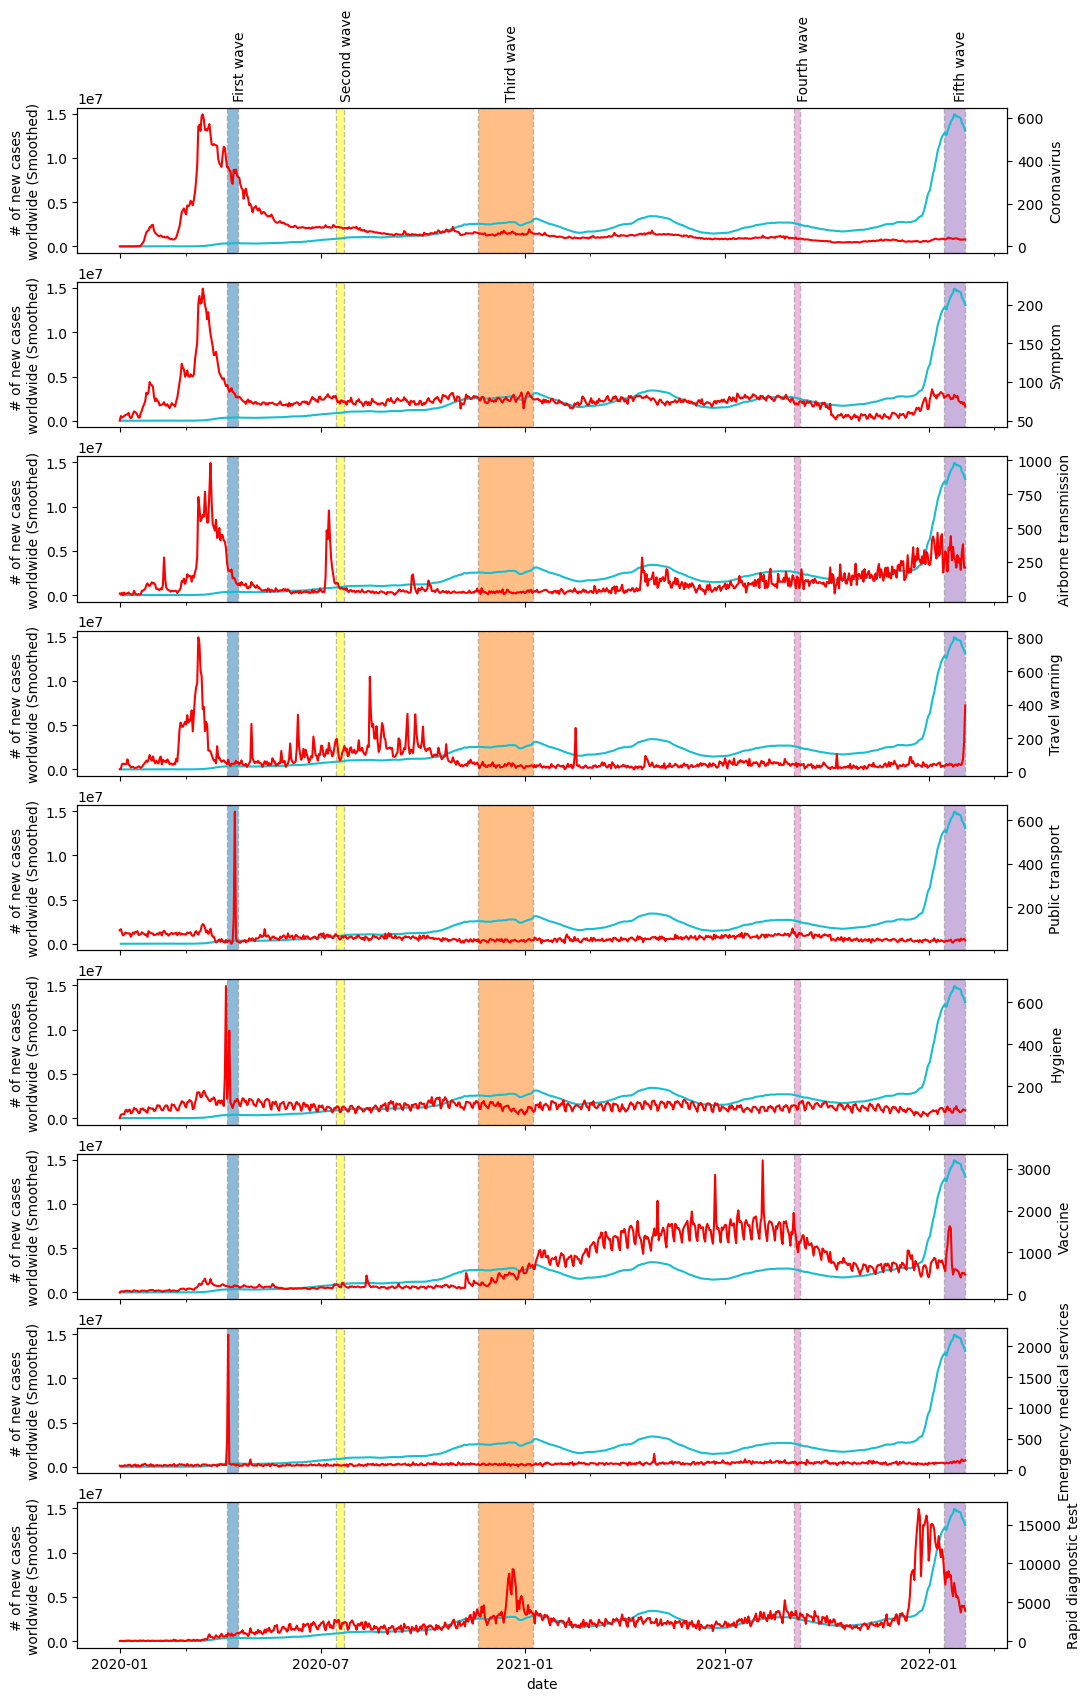

In [13]:
fig, axes = plt.subplots(nrows=9, sharex='all', figsize=(12, 20))

for index in range(9):
    current_column = tags[index]
    current_column = current_column.replace("/", ".")
    current_label = labels[index]

    ax2 = axes[index].twinx()

    ax2.set_ylabel(current_label)
    axes[index].set_ylabel('# of new cases \nworldwide (Smoothed)')

    sns.lineplot(x = df_trends['date'].dt.date, y = df_trends[current_column], ax=ax2, color="r")
    sns.lineplot(x = df_cases_global["date"], y = df_cases_global["new_cases_smoothed"], ax=axes[index], color="tab:cyan", ci=None)

    axes[index].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    axes[index].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=3))

    for wave in waves:
        (wave_start, wave_end, label, color) = wave

        wave_start = date.fromisoformat(wave_start)
        wave_end = date.fromisoformat(wave_end)

        axes[index].axvspan(
            xmin = wave_start, xmax = wave_end, 
            edgecolor="grey", linestyle="--", facecolor=color, alpha=0.5
        )

        if index == 0:
            adj_x = wave_start + ((wave_end - wave_start) / 2)
            adj_y = df_trends.iloc[:, 1].max()

            ax2.annotate(
                " " * 3 + label, rotation=90,
                xy=(adj_x, adj_y),
                xycoords = 'data',
                horizontalalignment='left', verticalalignment='bottom',
            )

plt.savefig('../../graphs/Figure02_1_Merged-GT_vs_GlobalCases.Selected9.pdf', bbox_inches='tight')
plt.savefig('../../graphs/Figure02_1_Merged-GT_vs_GlobalCases.Selected9.png', bbox_inches='tight')
plt.show()

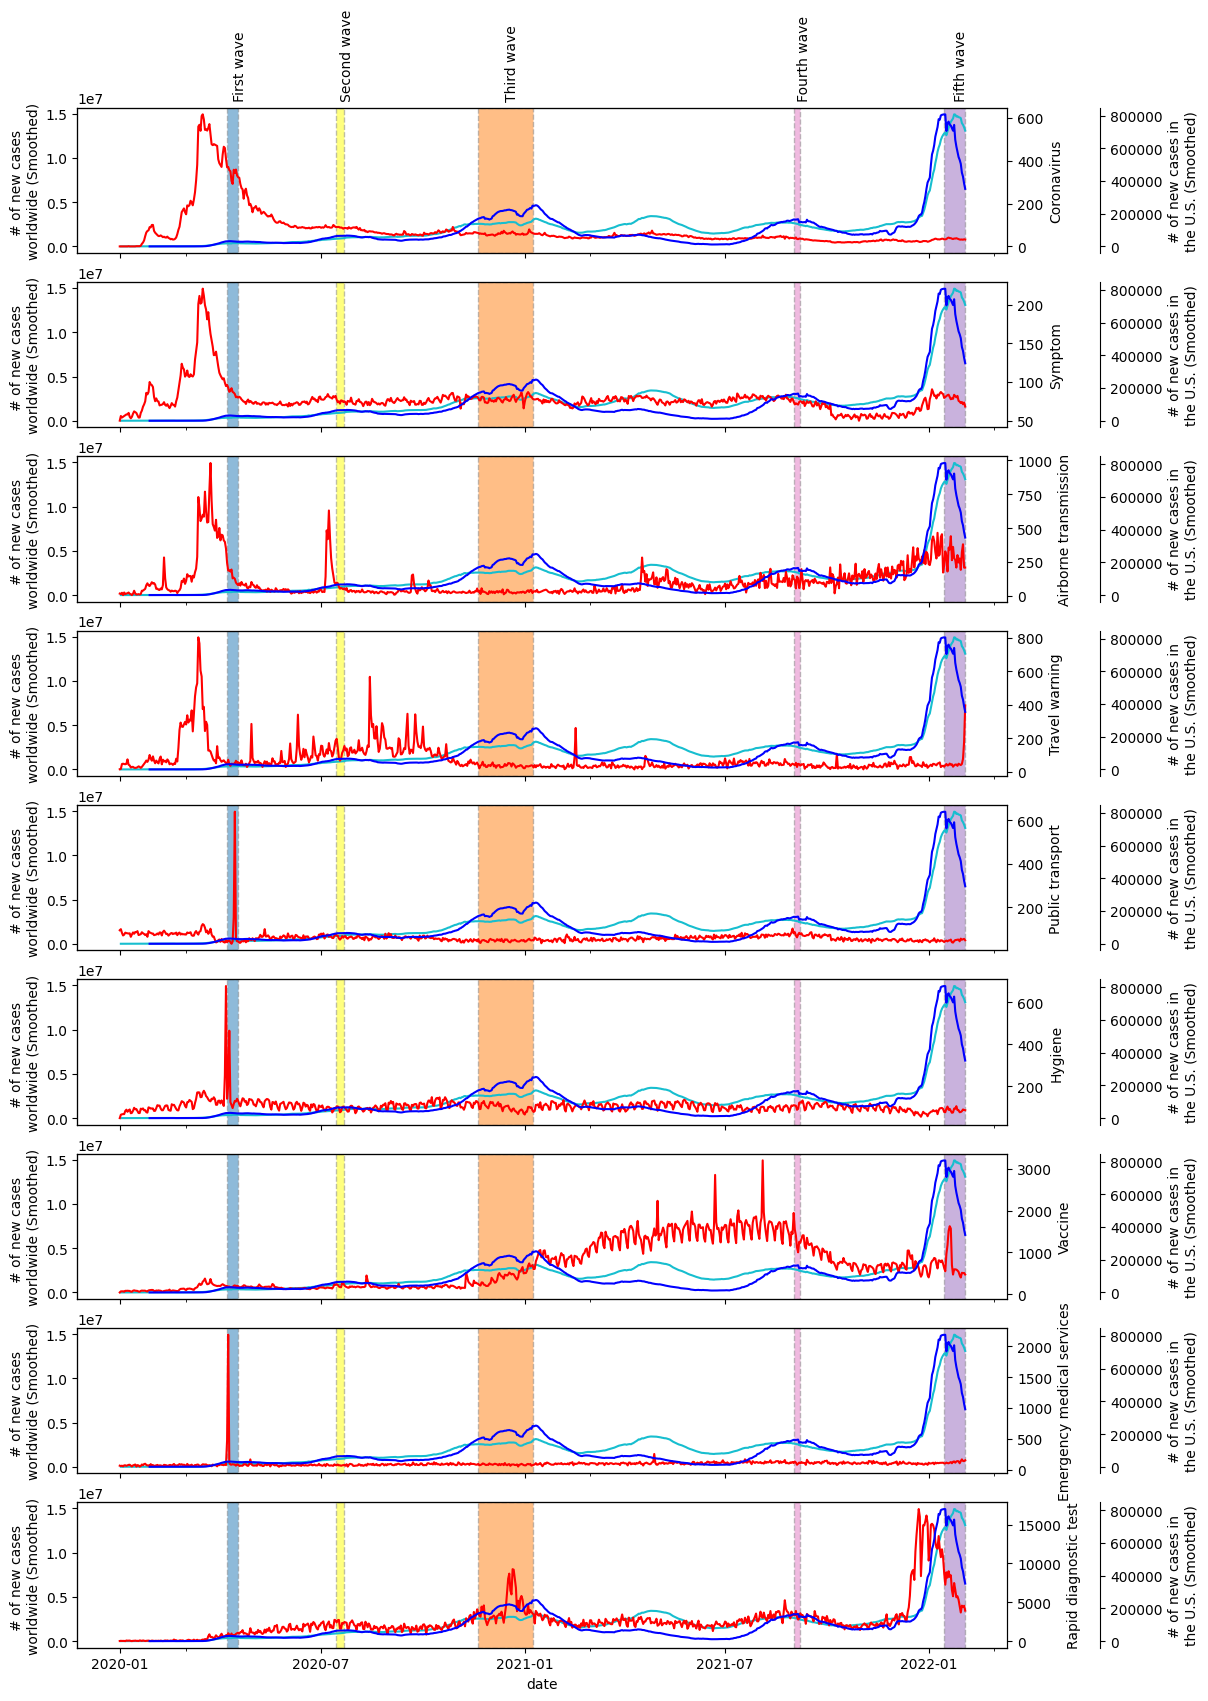

In [11]:
fig, axes = plt.subplots(nrows=9, sharex='all', figsize=(12, 20))

for index in range(9):
    current_column = tags[index]
    current_column = current_column.replace("/", ".")
    current_label = labels[index]

    ax2 = axes[index].twinx()
    ax3 = axes[index].twinx()

    ax2.set_ylabel(current_label)
    axes[index].set_ylabel('# of new cases \nworldwide (Smoothed)')
    ax3.set_ylabel('# of new cases in\nthe U.S. (Smoothed)')

    ax3.spines.right.set_position(("axes", 1.1))

    sns.lineplot(x = df_trends['date'].dt.date, y = df_trends[current_column], ax=ax2, color="r")
    sns.lineplot(x = df_cases_global["date"], y = df_cases_global["new_cases_smoothed"], ax=axes[index], color="tab:cyan", ci=None)
    sns.lineplot(x = df_cases_USA["date"], y = df_cases_USA["new_cases_smoothed"], ax=ax3, color="blue", ci=None)

    axes[index].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    axes[index].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=3))

    for wave in waves:
        (wave_start, wave_end, label, color) = wave

        wave_start = date.fromisoformat(wave_start)
        wave_end = date.fromisoformat(wave_end)

        axes[index].axvspan(
            xmin = wave_start, xmax = wave_end, 
            edgecolor="grey", linestyle="--", facecolor=color, alpha=0.5
        )

        if index == 0:
            adj_x = wave_start + ((wave_end - wave_start) / 2)
            adj_y = df_trends.iloc[:, 1].max()

            ax2.annotate(
                " " * 3 + label, rotation=90,
                xy=(adj_x, adj_y),
                xycoords = 'data',
                horizontalalignment='left', verticalalignment='bottom',
            )

plt.savefig('../../graphs/Merged-GT_vs_GlobalCasesAndUS.Selected9.pdf', bbox_inches='tight')
plt.savefig('../../graphs/Merged-GT_vs_GlobalCasesAndUS.Selected9.png', bbox_inches='tight')
plt.show()